# Lesson 14: Feature Engineering

Feature engineering is the process of transforming raw data into features that can be used to train machine learning models. It involves selecting, transforming, and creating new features from existing data to improve model performance and interpretability.

## Key aspects of feature engineering:

### Data Understanding:
Requires a deep understanding of the data and the problem being solved.

### Feature Creation:
Generating new features from existing ones through various techniques like:

- **One-hot encoding:** Converting categorical variables into numerical format.
- **Binning:** Grouping continuous data into ranges.
- **Feature splitting:** Breaking down existing features into smaller components.
- **Calculated features:** Creating new features based on mathematical operations on existing ones.

### Feature Transformation:
Applying mathematical or statistical transformations to existing features to improve their suitability for the model. Examples include:

- **Scaling:** Adjusting the range of feature values.
- **Normalization:** Scaling data to a specific range (e.g., 0 to 1).
- **Log transformation:** Applying a logarithmic function to skewed data.

### Feature Extraction:
Reducing the dimensionality of data by extracting relevant information, often using techniques like:

- **Principal Component Analysis (PCA):** Identifying principal components that capture the most variance in the data.
- **Independent Component Analysis (ICA):** Separating mixed signals into independent components.

### Feature Selection:
Choosing the most relevant features for the model, often using techniques like:
Feature importance scores: Evaluating the contribution of each feature to the model's predictions.

### Correlation analysis: Identifying features that are highly correlated with the target variable.

### Feature Storage:
Utilizing feature stores to manage and share engineered features efficiently across different teams and projects.

### Iterative Process:
Feature engineering is often an iterative process, requiring experimentation and refinement based on model performance.

## Why is feature engineering important?
Improved Model Performance: Better features can lead to more accurate and reliable models.
- Enhanced Model Interpretability: Feature engineering can make models easier to understand and explain.
- Reduced Model Complexity: Feature selection can simplify models and improve their efficiency.
- Feature Reusability: Well-engineered features can be reused across different projects and models.  

## Comparing Feature Selection, Feature Extraction, Feature Engineering and Feature Learning

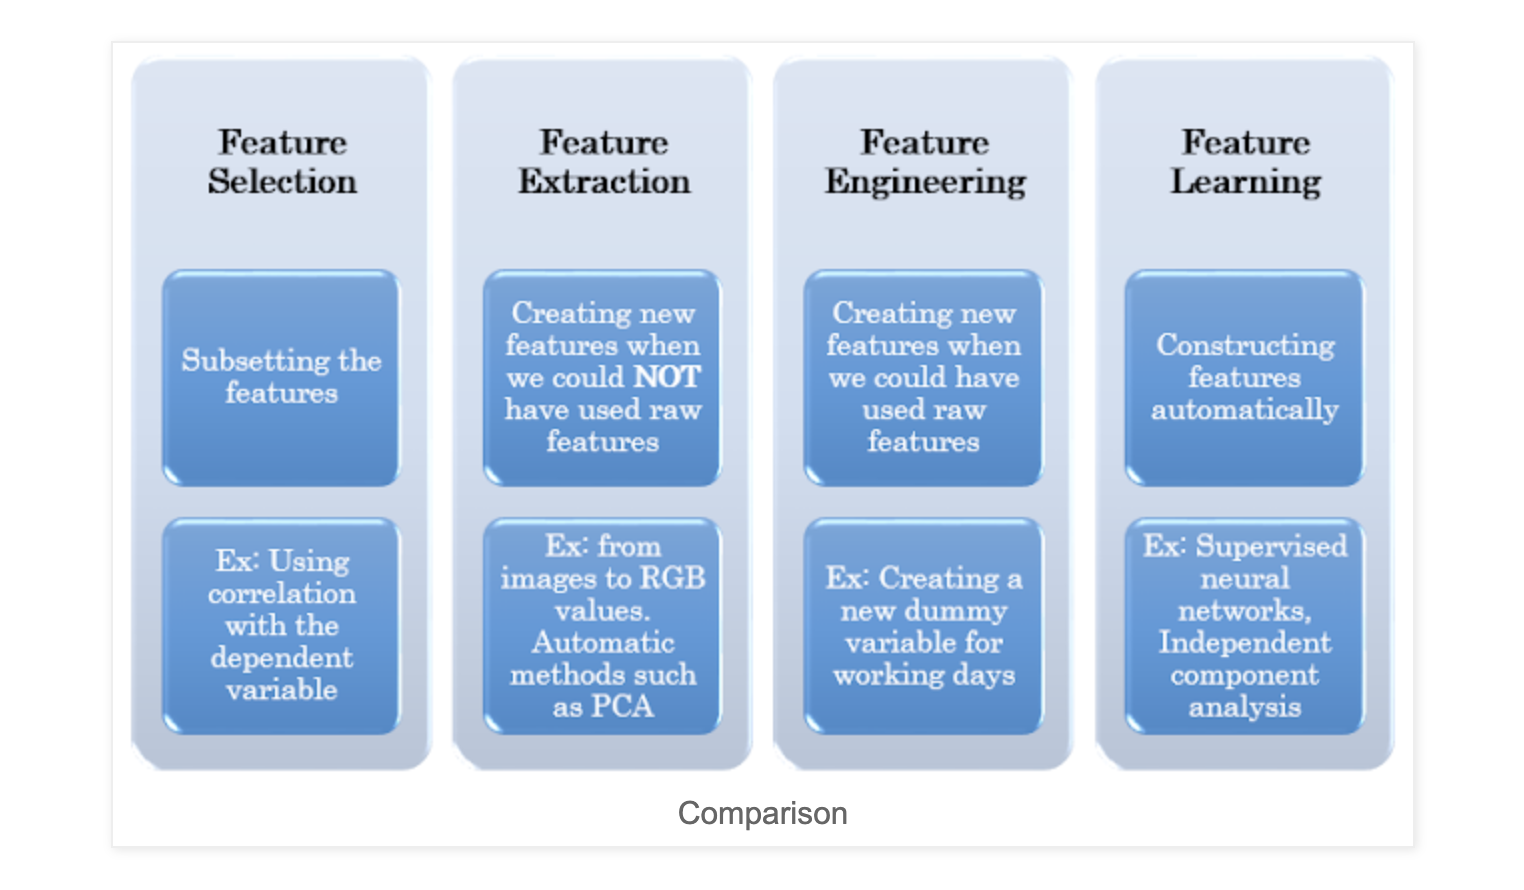

### Feature Extraction - PCA

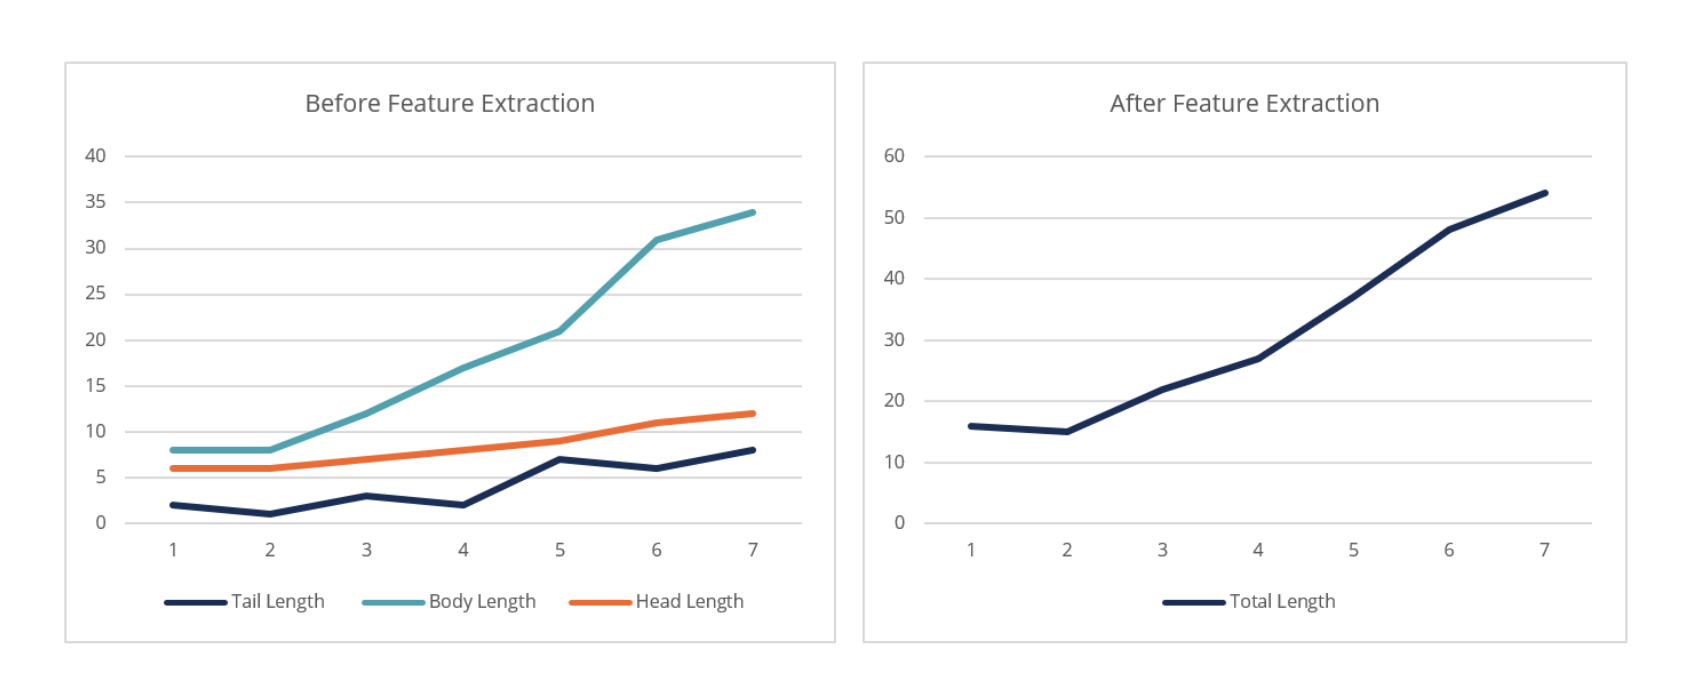

## Feature Selection

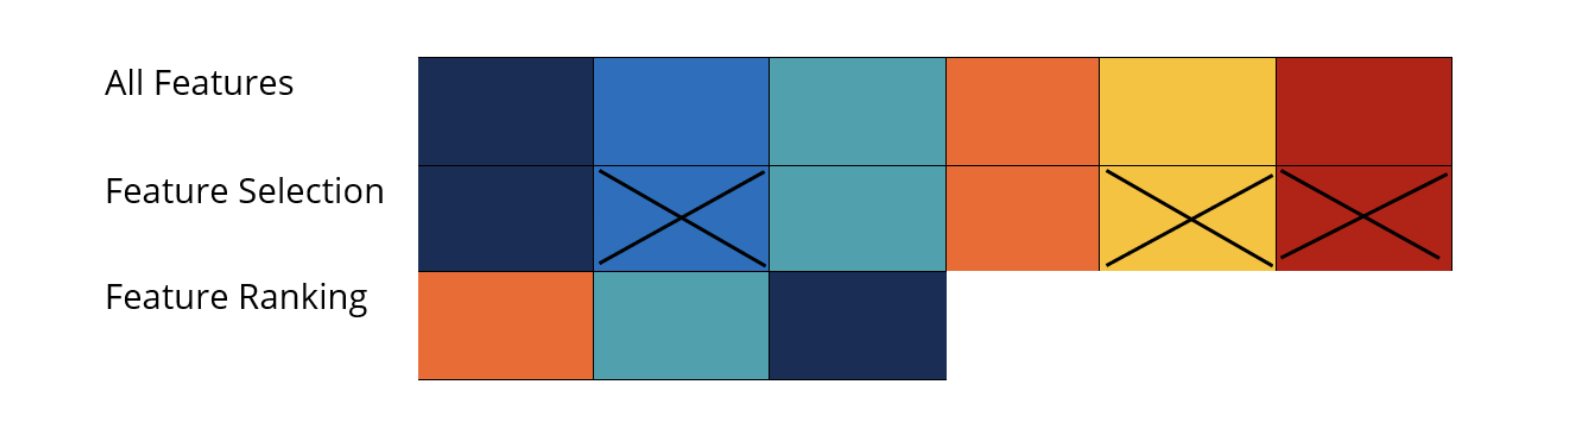

In [ ]:
df <- read.csv('/content/sample_data/all_gdp_refugees.csv')
head(df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,Country.of.Origin,Country.of.Asylum.ISO,Refugees,Returned.Refugees,Asylum.Seekers,IDPs,Returned.IDPs,Stateless,HST,OOC
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,Afghanistan,-,2666294,61381,258862,1174306,123653,0,0,150369
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,Afghanistan,-,2624265,60541,333986,1837079,32649,0,0,448040
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,Afghanistan,-,2501447,383950,369072,1797551,0,0,0,114221
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,Afghanistan,-,2596259,17815,85407,805409,0,0,0,201361
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,Afghanistan,-,2887114,57577,30406,297129,7225,0,0,1479
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,Afghanistan,-,2556483,39665,75284,631286,21830,0,0,275817


In [ ]:
print(colnames(df))

 [1] "country"               "iso2c"                 "iso3c"                
 [4] "year"                  "lastupdated"           "edu_exp_gdp"          
 [7] "gdp_per_capita"        "gov_exp_gdp"           "unemployment_rate"    
[10] "inflation_rate"        "population"            "urban_pop_percent"    
[13] "education_index"       "hdi_proxy"             "region"               
[16] "capital"               "longitude"             "latitude"             
[19] "income"                "lending"               "Country.of.Asylum"    
[22] "Country.of.Origin"     "Country.of.Asylum.ISO" "Refugees"             
[25] "Returned.Refugees"     "Asylum.Seekers"        "IDPs"                 
[28] "Returned.IDPs"         "Stateless"             "HST"                  
[31] "OOC"                  


### Adjust automatically groups countries into the following business regions:

- EMEA (Europe, the Middle East and Africa)
- NA (North America)
- LATAM (Latin America)
- APAC (Asia-Pacific)

In [ ]:
# Create a named vector to map countries to regions
region_mapping <- c(
    # EMEA (Europe, the Middle East and Africa)
    'Afghanistan' = 'APAC', # Based on general business/economic regions, Afghanistan is often grouped with APAC
    'Albania' = 'EMEA',
    'Algeria' = 'EMEA',
    'Angola' = 'EMEA',
    'Argentina' = 'LATAM',
    'Armenia' = 'EMEA',
    'Australia' = 'APAC',
    'Austria' = 'EMEA',
    'Azerbaijan' = 'EMEA',
    'Bahamas' = 'LATAM',
    'Bahrain' = 'EMEA',
    'Bangladesh' = 'APAC',
    'Belarus' = 'EMEA',
    'Belgium' = 'EMEA',
    'Belize' = 'LATAM',
    'Benin' = 'EMEA',
    'Bhutan' = 'APAC',
    'Bolivia' = 'LATAM',
    'Bosnia and Herzegovina' = 'EMEA',
    'Botswana' = 'EMEA',
    'Brazil' = 'LATAM',
    'Brunei Darussalam' = 'APAC',
    'Bulgaria' = 'EMEA',
    'Burkina Faso' = 'EMEA',
    'Burundi' = 'EMEA',
    'Cabo Verde' = 'EMEA',
    'Cambodia' = 'APAC',
    'Cameroon' = 'EMEA',
    'Canada' = 'NA',
    'Central African Republic' = 'EMEA',
    'Chad' = 'EMEA',
    'Chile' = 'LATAM',
    'China' = 'APAC',
    'Colombia' = 'LATAM',
    'Comoros' = 'EMEA',
    'Congo, Dem. Rep.' = 'EMEA',
    'Congo, Rep.' = 'EMEA',
    'Costa Rica' = 'LATAM',
    "Cote d'Ivoire" = 'EMEA',
    'Croatia' = 'EMEA',
    'Cuba' = 'LATAM',
    'Cyprus' = 'EMEA',
    'Czech Republic' = 'EMEA',
    'Denmark' = 'EMEA',
    'Djibouti' = 'EMEA',
    'Dominican Republic' = 'LATAM',
    'Ecuador' = 'LATAM',
    'Egypt, Arab Rep.' = 'EMEA',
    'El Salvador' = 'LATAM',
    'Equatorial Guinea' = 'EMEA',
    'Eritrea' = 'EMEA',
    'Estonia' = 'EMEA',
    'Eswatini' = 'EMEA',
    'Ethiopia' = 'EMEA',
    'Fiji' = 'APAC',
    'Finland' = 'EMEA',
    'France' = 'EMEA',
    'Gabon' = 'EMEA',
    'Gambia' = 'EMEA',
    'Georgia' = 'EMEA',
    'Germany' = 'EMEA',
    'Ghana' = 'EMEA',
    'Greece' = 'EMEA',
    'Grenada' = 'LATAM',
    'Guatemala' = 'LATAM',
    'Guinea' = 'EMEA',
    'Guinea-Bissau' = 'EMEA',
    'Guyana' = 'LATAM',
    'Haiti' = 'LATAM',
    'Honduras' = 'LATAM',
    'Hungary' = 'EMEA',
    'Iceland' = 'EMEA',
    'India' = 'APAC',
    'Indonesia' = 'APAC',
    'Iran, Islamic Rep.' = 'EMEA',
    'Iraq' = 'EMEA',
    'Ireland' = 'EMEA',
    'Israel' = 'EMEA',
    'Italy' = 'EMEA',
    'Jamaica' = 'LATAM',
    'Japan' = 'APAC',
    'Jordan' = 'EMEA',
    'Kazakhstan' = 'EMEA',
    'Kenya' = 'EMEA',
    'Kiribati' = 'APAC',
    'Korea, Dem. People\'s Rep.' = 'APAC',
    'Korea, Rep.' = 'APAC',
    'Kosovo' = 'EMEA',
    'Kuwait' = 'EMEA',
    'Kyrgyz Republic' = 'EMEA',
    "Lao PDR" = "APAC",
    'Latvia' = 'EMEA',
    'Lebanon' = 'EMEA',
    'Lesotho' = 'EMEA',
    'Liberia' = 'EMEA',
    'Libya' = 'EMEA',
    'Lithuania' = 'EMEA',
    'Luxembourg' = 'EMEA',
    'Madagascar' = 'EMEA',
    'Malawi' = 'EMEA',
    'Malaysia' = 'APAC',
    'Maldives' = 'APAC',
    'Mali' = 'EMEA',
    'Malta' = 'EMEA',
    'Marshall Islands' = 'APAC',
    'Mauritania' = 'EMEA',
    'Mauritius' = 'EMEA',
    'Mexico' = 'LATAM',
    'Micronesia, Fed. Sts.' = 'APAC',
    'Moldova' = 'EMEA',
    'Monaco' = 'EMEA',
    'Mongolia' = 'APAC',
    'Montenegro' = 'EMEA',
    'Morocco' = 'EMEA',
    'Mozambique' = 'EMEA',
    'Myanmar' = 'APAC',
    'Namibia' = 'EMEA',
    'Nauru' = 'APAC',
    'Nepal' = 'APAC',
    'Netherlands' = 'EMEA',
    'New Zealand' = 'APAC',
    'Nicaragua' = 'LATAM',
    'Niger' = 'EMEA',
    'Nigeria' = 'EMEA',
    'North Macedonia' = 'EMEA',
    'Norway' = 'EMEA',
    'Oman' = 'EMEA',
    'Pakistan' = 'APAC',
    'Palau' = 'APAC',
    'Panama' = 'LATAM',
    'Papua New Guinea' = 'APAC',
    'Paraguay' = 'LATAM',
    'Peru' = 'LATAM',
    'Philippines' = 'APAC',
    'Poland' = 'EMEA',
    'Portugal' = 'EMEA',
    'Puerto Rico' = 'LATAM',
    'Qatar' = 'EMEA',
    'Romania' = 'EMEA',
    'Russian Federation' = 'EMEA',
    'Rwanda' = 'EMEA',
    'Samoa' = 'APAC',
    'San Marino' = 'EMEA',
    'Sao Tome and Principe' = 'EMEA',
    'Saudi Arabia' = 'EMEA',
    'Senegal' = 'EMEA',
    'Serbia' = 'EMEA',
    'Sierra Leone' = 'EMEA',
    'Singapore' = 'APAC',
    'Slovak Republic' = 'EMEA',
    'Slovenia' = 'EMEA',
    'Solomon Islands' = 'APAC',
    'Somalia' = 'EMEA',
    'South Africa' = 'EMEA',
    'South Sudan' = 'EMEA',
    'Spain' = 'EMEA',
    'Sri Lanka' = 'APAC',
    'St. Kitts and Nevis' = 'LATAM',
    'St. Lucia' = 'LATAM',
    'St. Vincent and the Grenadines' = 'LATAM',
    'Sudan' = 'EMEA',
    'Suriname' = 'LATAM',
    'Sweden' = 'EMEA',
    'Switzerland' = 'EMEA',
    'Syrian Arab Republic' = 'EMEA',
    'Taiwan, China' = 'APAC',
    'Tajikistan' = 'EMEA',
    'Tanzania' = 'EMEA',
    'Thailand' = 'APAC',
    'Timor-Leste' = 'APAC',
    'Togo' = 'EMEA',
    'Tonga' = 'APAC',
    'Trinidad and Tobago' = 'LATAM',
    'Tunisia' = 'EMEA',
    'Turkey' = 'EMEA',
    'Turkmenistan' = 'EMEA',
    'Tuvalu' = 'APAC',
    'Uganda' = 'EMEA',
    'Ukraine' = 'EMEA',
    'United Arab Emirates' = 'EMEA',
    'United Kingdom' = 'EMEA',
    'United States' = 'NA',
    'Uruguay' = 'LATAM',
    'Uzbekistan' = 'EMEA',
    'Vanuatu' = 'APAC',
    'Venezuela, RB' = 'LATAM',
    'Vietnam' = 'APAC',
    'West Bank and Gaza' = 'EMEA',
    'Yemen, Rep.' = 'EMEA',
    'Zambia' = 'EMEA',
    'Zimbabwe' = 'EMEA'
)

# Create the 'region' column based on the mapping
df$region <- region_mapping[df$country]

# Check if there are any countries not in the mapping
unknown_countries <- unique(df$country[is.na(df$region)])

if (length(unknown_countries) > 0) {
    print(paste("Warning: The following countries were not found in the region mapping:", paste(unknown_countries, collapse = ", ")))
}

# Display the first few rows with the new column
head(df)

[1] "Warning: The following countries were not found in the region mapping: American Samoa, Andorra, Antigua and Barbuda, Aruba, Bahamas, The, Barbados, Bermuda, British Virgin Islands, Cayman Islands, Curacao, Czechia, Dominica, Gambia, The, Hong Kong SAR, China, Liechtenstein, Macao SAR, China, Seychelles, Sint Maarten (Dutch part), Turkiye, Turks and Caicos Islands, Viet Nam"


,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,Country.of.Origin,Country.of.Asylum.ISO,Refugees,Returned.Refugees,Asylum.Seekers,IDPs,Returned.IDPs,Stateless,HST,OOC
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,Afghanistan,-,2666294,61381,258862,1174306,123653,0,0,150369
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,Afghanistan,-,2624265,60541,333986,1837079,32649,0,0,448040
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,Afghanistan,-,2501447,383950,369072,1797551,0,0,0,114221
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,Afghanistan,-,2596259,17815,85407,805409,0,0,0,201361
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,Afghanistan,-,2887114,57577,30406,297129,7225,0,0,1479
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,Afghanistan,-,2556483,39665,75284,631286,21830,0,0,275817


In [ ]:
print(colnames(df))

 [1] "country"               "iso2c"                 "iso3c"                
 [4] "year"                  "lastupdated"           "edu_exp_gdp"          
 [7] "gdp_per_capita"        "gov_exp_gdp"           "unemployment_rate"    
[10] "inflation_rate"        "population"            "urban_pop_percent"    
[13] "education_index"       "hdi_proxy"             "region"               
[16] "capital"               "longitude"             "latitude"             
[19] "income"                "lending"               "Country.of.Asylum"    
[22] "Country.of.Origin"     "Country.of.Asylum.ISO" "Refugees"             
[25] "Returned.Refugees"     "Asylum.Seekers"        "IDPs"                 
[28] "Returned.IDPs"         "Stateless"             "HST"                  
[31] "OOC"                  


In [ ]:
# Select the specified columns and display the first 10 rows
print(head(df[, c("region", "iso2c", "iso3c", "country", "capital", "longitude", "latitude")], 10))

   region iso2c iso3c     country capital longitude latitude
1    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
2    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
3    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
4    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
5    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
6    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
7    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
8    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
9    APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228
10   APAC    AF   AFG Afghanistan   Kabul   69.1761  34.5228


### Year

- 1990 - 1994
- 1995 - 1999
- 2000 - 2004
- 2005 - 2009
- 2010 - 2014
- 2015 - 2019
- 2020 - 2024

In [ ]:
# Print unique values in the 'year' column
print(unique(df$year))

 [1] 2015 2017 2016 2014 2009 2013 2006 2010 2011 2012 2007 2008 2021 1998 1999
[16] 2000 2019 1996 1997 2003 2020 2022 2001 2002 1995 2018 1994 2004 2005 2023
[31] 1990 1991 1992 1993


In [ ]:
# Create binary columns for each year range using one-hot encoding

df$'year_1990_1994' <- as.integer(df$year >= 1990 & df$year <= 1994)
df$'year_1995_1999' <- as.integer(df$year >= 1995 & df$year <= 1999)
df$'year_2000_2004' <- as.integer(df$year >= 2000 & df$year <= 2004)
df$'year_2005_2009' <- as.integer(df$year >= 2005 & df$year <= 2009)
df$'year_2010_2014' <- as.integer(df$year >= 2010 & df$year <= 2014)
df$'year_2015_2019' <- as.integer(df$year >= 2015 & df$year <= 2019)
df$'year_2020_2024' <- as.integer(df$year >= 2020 & df$year <= 2024)

# Display the first few rows with the new columns
head(df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,HST,OOC,HDI_Level,year_1990_1994,year_1995_1999,year_2000_2004,year_2005_2009,year_2010_2014,year_2015_2019,year_2020_2024
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,0,150369,NA,0,0,0,0,0,1,0
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,0,448040,NA,0,0,0,0,0,1,0
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,0,114221,NA,0,0,0,0,0,1,0
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,0,201361,NA,0,0,0,0,1,0,0
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,0,1479,NA,0,0,0,1,0,0,0
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,0,275817,NA,0,0,0,0,1,0,0


### Human Development Index (HDI)

In [ ]:
# Create a named vector to map countries to HDI Levels
hdi_mapping <- c(
    # Developed Countries (generally High to Very High HDI)
    'Australia' = 'developed countries',
    'Austria' = 'developed countries',
    'Belgium' = 'developed countries',
    'Canada' = 'developed countries',
    'Chile' = 'developed countries', # High HDI
    'Croatia' = 'developed countries', # Very High HDI
    'Cyprus' = 'developed countries',
    'Czech Republic' = 'developed countries',
    'Denmark' = 'developed countries',
    'Estonia' = 'developed countries',
    'Finland' = 'developed countries',
    'France' = 'developed countries',
    'Germany' = 'developed countries',
    'Greece' = 'developed countries',
    'Hungary' = 'developed countries',
    'Iceland' = 'developed countries',
    'Ireland' = 'developed countries',
    'Israel' = 'developed countries',
    'Italy' = 'developed countries',
    'Japan' = 'developed countries',
    'Korea, Rep.' = 'developed countries',
    'Latvia' = 'developed countries',
    'Lithuania' = 'developed countries',
    'Luxembourg' = 'developed countries',
    'Malta' = 'developed countries',
    'Netherlands' = 'developed countries',
    'New Zealand' = 'developed countries',
    'Norway' = 'developed countries',
    'Poland' = 'developed countries',
    'Portugal' = 'developed countries',
    'Puerto Rico' = 'developed countries', # High HDI
    'Qatar' = 'developed countries', # Very High HDI
    'Romania' = 'developed countries', # High HDI
    'Russian Federation' = 'developed countries', # High HDI
    'San Marino' = 'developed countries',
    'Saudi Arabia' = 'developed countries', # Very High HDI
    'Serbia' = 'developed countries', # High HDI
    'Singapore' = 'developed countries',
    'Slovak Republic' = 'developed countries',
    'Slovenia' = 'developed countries',
    'South Korea' = 'developed countries', # Often listed as Korea, Rep.
    'Spain' = 'developed countries',
    'Sweden' = 'developed countries',
    'Switzerland' = 'developed countries',
    'Taiwan, China' = 'developed countries', # High HDI (based on various reports)
    'Trinidad and Tobago' = 'developed countries', # High HDI
    'Turkey' = 'developed countries', # High HDI
    'Ukraine' = 'developed countries', # Medium HDI, but often considered developing/emerging
    'United Arab Emirates' = 'developed countries', # Very High HDI
    'United Kingdom' = 'developed countries',
    'United States' = 'developed countries',
    'Uruguay' = 'developed countries', # High HDI

    # Developing Countries (generally Medium to High HDI)
    'Albania' = 'developing countries',
    'Algeria' = 'developing countries',
    'Angola' = 'developing countries',
    'Argentina' = 'developing countries', # Already listed as developed, re-classifying as developing based on common perception/HDI trends
    'Armenia' = 'developing countries',
    'Azerbaijan' = 'developing countries',
    'Bahamas' = 'developing countries', # High HDI, but often grouped with developing economies
    'Bahrain' = 'developing countries', # Already listed as developed, re-classifying as developing based on common perception/HDI trends
    'Bangladesh' = 'developing countries',
    'Belarus' = 'developing countries',
    'Belize' = 'developing countries',
    'Benin' = 'developing countries', # Low HDI
    'Bhutan' = 'developing countries',
    'Bolivia' = 'developing countries',
    'Bosnia and Herzegovina' = 'developing countries',
    'Botswana' = 'developing countries',
    'Brazil' = 'developing countries',
    'Brunei Darussalam' = 'developing countries', # Very High HDI, but often grouped with developing economies
    'Bulgaria' = 'developing countries',
    'Burkina Faso' = 'developing countries', # Low HDI
    'Burundi' = 'developing countries', # Low HDI
    'Cabo Verde' = 'developing countries', # Medium HDI
    'Cambodia' = 'developing countries',
    'Cameroon' = 'developing countries',
    'Central African Republic' = 'underdeveloped countries', # Low HDI - re-classifying
    'Chad' = 'underdeveloped countries', # Low HDI - re-classifying
    'Colombia' = 'developing countries',
    'Comoros' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Congo, Dem. Rep.' = 'underdeveloped countries', # Low HDI - re-classifying
    'Congo, Rep.' = 'developing countries', # Medium HDI
    'Costa Rica' = 'developing countries', # Already listed as developed, re-classifying as developing
    "Cote d'Ivoire" = 'developing countries', # Medium HDI
    'Cuba' = 'developing countries',
    'Djibouti' = 'developing countries', # Medium HDI
    'Dominican Republic' = 'developing countries',
    'Ecuador' = 'developing countries',
    'Egypt, Arab Rep.' = 'developing countries',
    'El Salvador' = 'developing countries',
    'Equatorial Guinea' = 'developing countries', # Medium HDI
    'Eritrea' = 'underdeveloped countries', # Low HDI - re-classifying
    'Eswatini' = 'developing countries', # Medium HDI
    'Ethiopia' = 'developing countries', # Low HDI, re-classifying based on recent trends
    'Fiji' = 'developing countries', # High HDI, but often grouped with developing economies
    'Gabon' = 'developing countries', # High HDI
    'Gambia' = 'underdeveloped countries', # Low HDI - re-classifying
    'Georgia' = 'developing countries',
    'Ghana' = 'developing countries',
    'Grenada' = 'developed countries', # High HDI, often grouped with developed in Caribbean
    'Guatemala' = 'developing countries',
    'Guinea' = 'underdeveloped countries', # Low HDI - re-classifying
    'Guinea-Bissau' = 'underdeveloped countries', # Low HDI - re-classifying
    'Guyana' = 'developing countries', # High HDI, but often grouped with developing
    'Haiti' = 'underdeveloped countries', # Low HDI - re-classifying
    'Honduras' = 'developing countries',
    'India' = 'developing countries',
    'Indonesia' = 'developing countries',
    'Iran, Islamic Rep.' = 'developing countries',
    'Iraq' = 'developing countries', # High HDI, but often grouped with developing
    'Jamaica' = 'developing countries', # High HDI
    'Jordan' = 'developing countries',
    'Kazakhstan' = 'developing countries',
    'Kenya' = 'developing countries',
    'Kiribati' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Korea, Dem. People\'s Rep.' = 'underdeveloped countries', # Low HDI (estimates) - re-classifying
    'Kosovo' = 'developing countries', # High HDI, but often grouped with developing
    'Kuwait' = 'developed countries', # Already listed as developed, keeping as developed
    'Kyrgyz Republic' = 'developing countries',
    "Lao PDR" = "developing countries",
    'Lebanon' = 'developing countries', # High HDI, but often grouped with developing
    'Lesotho' = 'underdeveloped countries', # Low HDI - re-classifying
    'Liberia' = 'underdeveloped countries', # Low HDI - re-classifying
    'Libya' = 'developing countries', # High HDI, but often grouped with developing
    'Madagascar' = 'underdeveloped countries', # Low HDI - re-classifying
    'Malawi' = 'underdeveloped countries', # Low HDI - re-classifying
    'Malaysia' = 'developing countries',
    'Maldives' = 'developed countries', # High HDI, re-classifying as developed based on HDI
    'Mali' = 'underdeveloped countries', # Low HDI - re-classifying
    'Marshall Islands' = 'developing countries', # Medium HDI
    'Mauritania' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Mauritius' = 'developed countries', # High HDI, re-classifying as developed
    'Mexico' = 'developing countries',
    'Micronesia, Fed. Sts.' = 'developing countries', # Medium HDI
    'Moldova' = 'developing countries',
    'Mongolia' = 'developing countries',
    'Montenegro' = 'developed countries', # Very High HDI, re-classifying as developed
    'Morocco' = 'developing countries',
    'Mozambique' = 'underdeveloped countries', # Low HDI - re-classifying
    'Myanmar' = 'developing countries',
    'Namibia' = 'developing countries', # High HDI
    'Nauru' = 'developing countries', # High HDI, re-classifying as developing
    'Nepal' = 'developing countries',
    'Nicaragua' = 'developing countries',
    'Niger' = 'underdeveloped countries', # Low HDI - re-classifying
    'Nigeria' = 'developing countries', # Medium HDI
    'North Macedonia' = 'developed countries', # High HDI, re-classifying as developed
    'Oman' = 'developed countries', # Very High HDI, re-classifying as developed
    'Pakistan' = 'developing countries',
    'Palau' = 'developed countries', # Very High HDI, re-classifying as developed
    'Panama' = 'developed countries', # Very High HDI, re-classifying as developed
    'Papua New Guinea' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Paraguay' = 'developing countries',
    'Peru' = 'developing countries',
    'Philippines' = 'developing countries',
    'Romania' = 'developed countries', # Already listed as developed, keeping as developed
    'Russian Federation' = 'developed countries', # Already listed as developed, keeping as developed
    'Rwanda' = 'underdeveloped countries', # Low HDI - re-classifying
    'Samoa' = 'developing countries', # High HDI
    'Sao Tome and Principe' = 'developing countries', # Medium HDI
    'Senegal' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Sierra Leone' = 'underdeveloped countries', # Low HDI - re-classifying
    'Solomon Islands' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Somalia' = 'underdeveloped countries', # Low HDI (estimates) - re-classifying
    'South Africa' = 'developing countries', # High HDI, but often grouped with developing
    'South Sudan' = 'underdeveloped countries', # Low HDI - re-classifying
    'Sri Lanka' = 'developing countries', # High HDI
    'St. Kitts and Nevis' = 'developed countries', # Very High HDI, re-classifying as developed
    'St. Lucia' = 'developed countries', # High HDI, re-classifying as developed
    'St. Vincent and the Grenadines' = 'developed countries', # High HDI, re-classifying as developed
    'Sudan' = 'underdeveloped countries', # Low HDI - re-classifying
    'Suriname' = 'developing countries', # High HDI
    'Syrian Arab Republic' = 'underdeveloped countries', # Low HDI (estimates) - re-classifying
    'Tajikistan' = 'developing countries', # Medium HDI
    'Tanzania' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Thailand' = 'developing countries', # High HDI
    'Timor-Leste' = 'developing countries', # Medium HDI
    'Togo' = 'underdeveloped countries', # Low HDI - re-classifying
    'Tonga' = 'developed countries', # High HDI, re-classifying as developed
    'Tunisia' = 'developing countries', # High HDI
    'Turkmenistan' = 'developing countries', # High HDI
    'Tuvalu' = 'developed countries', # High HDI, re-classifying as developed
    'Uganda' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Ukraine' = 'developing countries', # High HDI, re-classifying as developing
    'United Arab Emirates' = 'developed countries', # Already listed as developed, keeping as developed
    'United Kingdom' = 'developed countries', # Already listed as developed, keeping as developed
    'United States' = 'developed countries', # Already listed as developed, keeping as developed
    'Uruguay' = 'developed countries', # Already listed as developed, keeping as developed
    'Uzbekistan' = 'developing countries', # Medium HDI
    'Vanuatu' = 'developing countries', # Medium HDI
    'Venezuela, RB' = 'developing countries', # High HDI, but often grouped with developing
    'Vietnam' = 'developing countries', # Medium HDI
    'West Bank and Gaza' = 'developing countries', # Medium HDI
    'Yemen, Rep.' = 'underdeveloped countries', # Low HDI (estimates) - re-classifying
    'Zambia' = 'underdeveloped countries', # Medium HDI, re-classifying based on economic factors
    'Zimbabwe' = 'underdeveloped countries' # Medium HDI, re-classifying based on economic factors

    # Underdeveloped Countries (generally Low HDI)
    # Many already included in the developing list and re-classified above
)

# Create the 'HDI_Level' column based on the mapping
df$HDI_Level <- hdi_mapping[df$country]

# Check if there are any countries not in the mapping
unknown_hdi_countries <- unique(df$country[is.na(df$HDI_Level)])

if (length(unknown_hdi_countries) > 0) {
    print(paste("Warning: The following countries were not found in the HDI level mapping:", paste(unknown_hdi_countries, collapse = ", ")))
}

# Display the first few rows with the new column
head(df)

[1] "Warning: The following countries were not found in the HDI level mapping: Afghanistan, American Samoa, Andorra, Antigua and Barbuda, Aruba, Bahamas, The, Barbados, Bermuda, British Virgin Islands, Cayman Islands, China, Curacao, Czechia, Dominica, Gambia, The, Hong Kong SAR, China, Liechtenstein, Macao SAR, China, Monaco, Seychelles, Sint Maarten (Dutch part), Turkiye, Turks and Caicos Islands, Viet Nam"


,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,HST,OOC,HDI_Level,year_1990_1994,year_1995_1999,year_2000_2004,year_2005_2009,year_2010_2014,year_2015_2019,year_2020_2024
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,0,150369,NA,0,0,0,0,0,1,0
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,0,448040,NA,0,0,0,0,0,1,0
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,0,114221,NA,0,0,0,0,0,1,0
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,0,201361,NA,0,0,0,0,1,0,0
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,0,1479,NA,0,0,0,1,0,0,0
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,0,275817,NA,0,0,0,0,1,0,0


In [ ]:
print(colnames(df))

 [1] "country"               "iso2c"                 "iso3c"                
 [4] "year"                  "lastupdated"           "edu_exp_gdp"          
 [7] "gdp_per_capita"        "gov_exp_gdp"           "unemployment_rate"    
[10] "inflation_rate"        "population"            "urban_pop_percent"    
[13] "education_index"       "hdi_proxy"             "region"               
[16] "capital"               "longitude"             "latitude"             
[19] "income"                "lending"               "Country.of.Asylum"    
[22] "Country.of.Origin"     "Country.of.Asylum.ISO" "Refugees"             
[25] "Returned.Refugees"     "Asylum.Seekers"        "IDPs"                 
[28] "Returned.IDPs"         "Stateless"             "HST"                  
[31] "OOC"                   "HDI_Level"             "year_1990_1994"       
[34] "year_1995_1999"        "year_2000_2004"        "year_2005_2009"       
[37] "year_2010_2014"        "year_2015_2019"        "year_2020_2024"       

### Income_level

In [ ]:
# Check unique values in the 'income' column to understand existing levels
print(unique(df$income))

# Create a named vector to map existing income levels to the new levels
# Assuming the existing levels are standard World Bank income classifications:
# Low income, Lower middle income, Upper middle income, High income
income_mapping <- c(
    'Low income' = 'low',
    'Lower middle income' = 'medium-low',
    'Upper middle income' = 'medium-high',
    'High income' = 'high'
    # Add other income levels from your unique check if they exist and need mapping
)

# Create the 'income_level' column based on the mapping
df$income_level <- income_mapping[df$income]

# Check if there are any income levels not in the mapping
unknown_income_levels <- unique(df$income[is.na(df$income_level)])

if (length(unknown_income_levels) > 0) {
    print(paste("Warning: The following income levels were not found in the mapping:", paste(unknown_income_levels, collapse = ", ")))
}

# Display the first few rows with the new column
head(df)

[1] "Low income"          "Upper middle income" "High income"        
[4] "Lower middle income" "Not classified"     
[1] "Warning: The following income levels were not found in the mapping: Not classified"


,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,OOC,HDI_Level,year_1990_1994,year_1995_1999,year_2000_2004,year_2005_2009,year_2010_2014,year_2015_2019,year_2020_2024,income_level
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,150369,NA,0,0,0,0,0,1,0,low
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,448040,NA,0,0,0,0,0,1,0,low
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,114221,NA,0,0,0,0,0,1,0,low
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,201361,NA,0,0,0,0,1,0,0,low
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,1479,NA,0,0,0,1,0,0,0,low
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,275817,NA,0,0,0,0,1,0,0,low


### Unemployment_rate_level & inflation_rate_level

In [ ]:
# Define thresholds for unemployment rate levels (example thresholds)
unemployment_low_threshold = 5
unemployment_medium_low_threshold = 10
unemployment_medium_high_threshold = 15

# Create the 'Unemployment_rate_level' column
df$Unemployment_rate_level <- cut(df$unemployment_rate,
                                    breaks = c(-Inf, unemployment_low_threshold, unemployment_medium_low_threshold, unemployment_medium_high_threshold, Inf),
                                    labels = c("low", "medium-low", "medium-high", "high"),
                                    right = TRUE,
                                    include.lowest = TRUE)

# Define thresholds for inflation rate levels (example thresholds)
inflation_low_threshold = 2
inflation_medium_low_threshold = 5
inflation_medium_high_threshold = 10

# Create the 'inflation_rate_level' column
df$inflation_rate_level <- cut(df$inflation_rate,
                                 breaks = c(-Inf, inflation_low_threshold, inflation_medium_low_threshold, inflation_medium_high_threshold, Inf),
                                 labels = c("low", "medium-low", "medium-high", "high"),
                                 right = TRUE,
                                 include.lowest = TRUE)


# Display the first few rows with the new columns
head(df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,year_1990_1994,year_1995_1999,year_2000_2004,year_2005_2009,year_2010_2014,year_2015_2019,year_2020_2024,income_level,Unemployment_rate_level,inflation_rate_level
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<fct>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,0,0,0,0,0,1,0,low,medium-low,low
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,0,0,0,0,0,1,0,low,medium-high,medium-low
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,0,0,0,0,0,1,0,low,medium-high,medium-low
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,0,0,0,0,1,0,0,low,medium-low,medium-low
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,0,0,0,1,0,0,0,low,medium-low,low
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,0,0,0,0,1,0,0,low,medium-low,medium-high


In [ ]:
print(colnames(df))

 [1] "country"                 "iso2c"                  
 [3] "iso3c"                   "year"                   
 [5] "lastupdated"             "edu_exp_gdp"            
 [7] "gdp_per_capita"          "gov_exp_gdp"            
 [9] "unemployment_rate"       "inflation_rate"         
[11] "population"              "urban_pop_percent"      
[13] "education_index"         "hdi_proxy"              
[15] "region"                  "capital"                
[17] "longitude"               "latitude"               
[19] "income"                  "lending"                
[21] "Country.of.Asylum"       "Country.of.Origin"      
[23] "Country.of.Asylum.ISO"   "Refugees"               
[25] "Returned.Refugees"       "Asylum.Seekers"         
[27] "IDPs"                    "Returned.IDPs"          
[29] "Stateless"               "HST"                    
[31] "OOC"                     "HDI_Level"              
[33] "year_1990_1994"          "year_1995_1999"         
[35] "year_2000_2004"          

### Refugees_Level & Returned.Refugees_Level

In [ ]:
# Define thresholds for Refugees levels (example thresholds - these may need adjustment based on data distribution)
refugees_low_threshold = 10000
refugees_medium_low_threshold = 100000
refugees_medium_high_threshold = 500000

# Create the 'Refugees_Level' column
df$Refugees_Level <- cut(df$Refugees,
                           breaks = c(-Inf, refugees_low_threshold, refugees_medium_low_threshold, refugees_medium_high_threshold, Inf),
                           labels = c("low", "medium-low", "medium-high", "high"),
                           right = TRUE,
                           include.lowest = TRUE)

# Define thresholds for Returned.Refugees levels (example thresholds - these may need adjustment based on data distribution)
returned_refugees_low_threshold = 1000
returned_refugees_medium_low_threshold = 10000
returned_refugees_medium_high_threshold = 50000

# Create the 'Returned.Refugees_Level' column
df$Returned.Refugees_Level <- cut(df$Returned.Refugees,
                                     breaks = c(-Inf, returned_refugees_low_threshold, returned_refugees_medium_low_threshold, returned_refugees_medium_high_threshold, Inf),
                                     labels = c("low", "medium-low", "medium-high", "high"),
                                     right = TRUE,
                                     include.lowest = TRUE)

# Display the first few rows with the new columns
head(df)

,country,iso2c,iso3c,year,lastupdated,edu_exp_gdp,gdp_per_capita,gov_exp_gdp,unemployment_rate,inflation_rate,⋯,year_2000_2004,year_2005_2009,year_2010_2014,year_2015_2019,year_2020_2024,income_level,Unemployment_rate_level,inflation_rate_level,Refugees_Level,Returned.Refugees_Level
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<fct>,<fct>,<fct>
1,Afghanistan,AF,AFG,2015,2025-07-01,3.25580,565.5697,NA,9.052,-0.6617092,⋯,0,0,0,1,0,low,medium-low,low,high,high
2,Afghanistan,AF,AFG,2017,2025-07-01,4.34319,525.4698,NA,11.184,4.9759515,⋯,0,0,0,1,0,low,medium-high,medium-low,high,high
3,Afghanistan,AF,AFG,2016,2025-07-01,4.54397,522.0822,NA,10.133,4.3838920,⋯,0,0,0,1,0,low,medium-high,medium-low,high,high
4,Afghanistan,AF,AFG,2014,2025-07-01,3.69522,625.0549,NA,7.915,4.6739960,⋯,0,0,1,0,0,low,medium-low,medium-low,high,medium-high
5,Afghanistan,AF,AFG,2009,2025-07-01,4.81064,452.0537,NA,7.754,-6.8111611,⋯,0,1,0,0,0,low,medium-low,low,high,high
6,Afghanistan,AF,AFG,2013,2025-07-01,3.45446,637.0871,NA,7.930,7.3857718,⋯,0,0,1,0,0,low,medium-low,medium-high,high,medium-high


In [ ]:
print(colnames(df))

 [1] "country"                 "iso2c"                  
 [3] "iso3c"                   "year"                   
 [5] "lastupdated"             "edu_exp_gdp"            
 [7] "gdp_per_capita"          "gov_exp_gdp"            
 [9] "unemployment_rate"       "inflation_rate"         
[11] "population"              "urban_pop_percent"      
[13] "education_index"         "hdi_proxy"              
[15] "region"                  "capital"                
[17] "longitude"               "latitude"               
[19] "income"                  "lending"                
[21] "Country.of.Asylum"       "Country.of.Origin"      
[23] "Country.of.Asylum.ISO"   "Refugees"               
[25] "Returned.Refugees"       "Asylum.Seekers"         
[27] "IDPs"                    "Returned.IDPs"          
[29] "Stateless"               "HST"                    
[31] "OOC"                     "HDI_Level"              
[33] "year_1990_1994"          "year_1995_1999"         
[35] "year_2000_2004"          

In [ ]:
# Load necessary library for data manipulation
library(dplyr)
library(tidyr) # For pivoting

# Define the year range columns
year_range_cols <- c(
    "year_1990_1994", "year_1995_1999", "year_2000_2004",
    "year_2005_2009", "year_2010_2014", "year_2015_2019",
    "year_2020_2024"
)

# Initialize an empty dataframe to store the analysis results
year_analysis <- data.frame()

# Iterate through each year range column
for (year_col in year_range_cols) {

  # Filter data for the current year range (where the one-hot encoded column is 1)
  df_filtered <- df %>%
    filter(!!sym(year_col) == 1)

  # Group filtered data by Refugees_Level and calculate the mean of edu_exp_gdp
  analysis_result <- df_filtered %>%
    group_by(Refugees_Level) %>%
    summarise(average_edu_exp_gdp = mean(edu_exp_gdp, na.rm = TRUE)) %>%
    ungroup()

  # Add a column for the current year range
  analysis_result$year_range <- year_col

  # Combine with the main analysis dataframe
  year_analysis <- bind_rows(year_analysis, analysis_result)
}

# Display the result
print(year_analysis)

   Refugees_Level average_edu_exp_gdp     year_range
1             low            5.000858 year_1990_1994
2      medium-low            3.479673 year_1990_1994
3     medium-high            3.465494 year_1990_1994
4            <NA>            4.306642 year_1990_1994
5             low            4.223165 year_1995_1999
6      medium-low            2.961489 year_1995_1999
7     medium-high            3.015606 year_1995_1999
8            high            3.417450 year_1995_1999
9            <NA>            5.288357 year_1995_1999
10            low            4.558575 year_2000_2004
11     medium-low            3.544193 year_2000_2004
12    medium-high            4.005589 year_2000_2004
13           high            2.206224 year_2000_2004
14           <NA>            5.739308 year_2000_2004
15            low            4.761558 year_2005_2009
16     medium-low            3.576113 year_2005_2009
17    medium-high            3.474341 year_2005_2009
18           high            3.464323 year_200

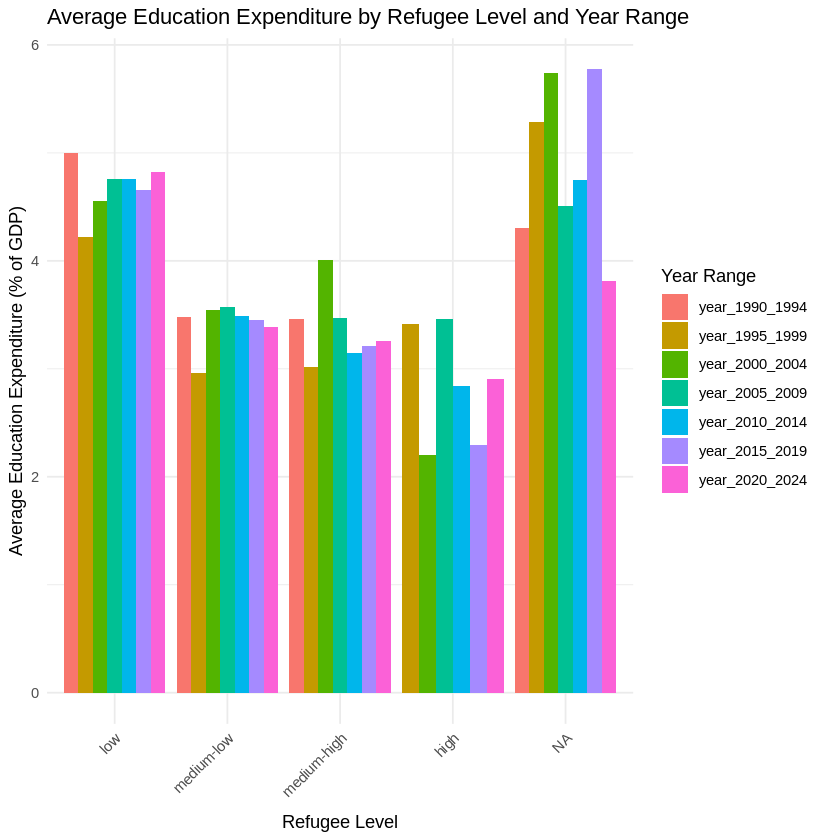

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: Refugees_Level, average_edu_exp_gdp, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(year_analysis, aes(x = Refugees_Level, y = average_edu_exp_gdp, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Average Education Expenditure by Refugee Level and Year Range",
       x = "Refugee Level",
       y = "Average Education Expenditure (% of GDP)",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [ ]:
# Load necessary library for data manipulation
library(dplyr)
library(tidyr) # For pivoting

# Define the year range columns
year_range_cols <- c(
    "year_1990_1994", "year_1995_1999", "year_2000_2004",
    "year_2005_2009", "year_2010_2014", "year_2015_2019",
    "year_2020_2024"
)

# Initialize an empty dataframe to store the analysis results
year_analysis <- data.frame()

# Iterate through each year range column
for (year_col in year_range_cols) {

  # Filter data for the current year range (where the one-hot encoded column is 1)
  df_filtered <- df %>%
    filter(!!sym(year_col) == 1)

# "gdp_per_capita"          "gov_exp_gdp"            "unemployment_rate"       "inflation_rate"         "population"

  # Group filtered data by Refugees_Level and calculate the mean of edu_exp_gdp
  analysis_result <- df_filtered %>%
    group_by(Refugees_Level) %>%
    summarise(average_gdp_per_capita = mean(gdp_per_capita, na.rm = TRUE), average_gov_exp_gdp = mean(gov_exp_gdp, na.rm = TRUE), average_unemployment_rate = mean(unemployment_rate, na.rm = TRUE), average_inflation_rate = mean(inflation_rate, na.rm = TRUE), average_population = mean(population, na.rm = TRUE)) %>%
    ungroup()

  # Add a column for the current year range
  analysis_result$year_range <- year_col

  # Combine with the main analysis dataframe
  year_analysis <- bind_rows(year_analysis, analysis_result)
}

# Display the result
print(year_analysis)

   Refugees_Level average_gdp_per_capita average_gov_exp_gdp
1             low              6143.4108           16.955949
2      medium-low              2133.2650           16.205342
3     medium-high               670.7831           13.420179
4            <NA>             13705.3895           17.772096
5             low              8293.5786           16.834105
6      medium-low              1574.7122           13.243526
7     medium-high               600.7074           19.288899
8            high               127.5142           18.159859
9            <NA>             24661.7556           18.574512
10            low             10883.6661           16.429438
11     medium-low              1176.4679           13.568794
12    medium-high              2049.5666           19.134207
13           high               319.8051           13.189073
14           <NA>             28846.1981           19.381268
15            low             17547.5112           17.125213
16     medium-low       

### "gdp_per_capita"          "gov_exp_gdp"            "unemployment_rate"       "inflation_rate"         "population"


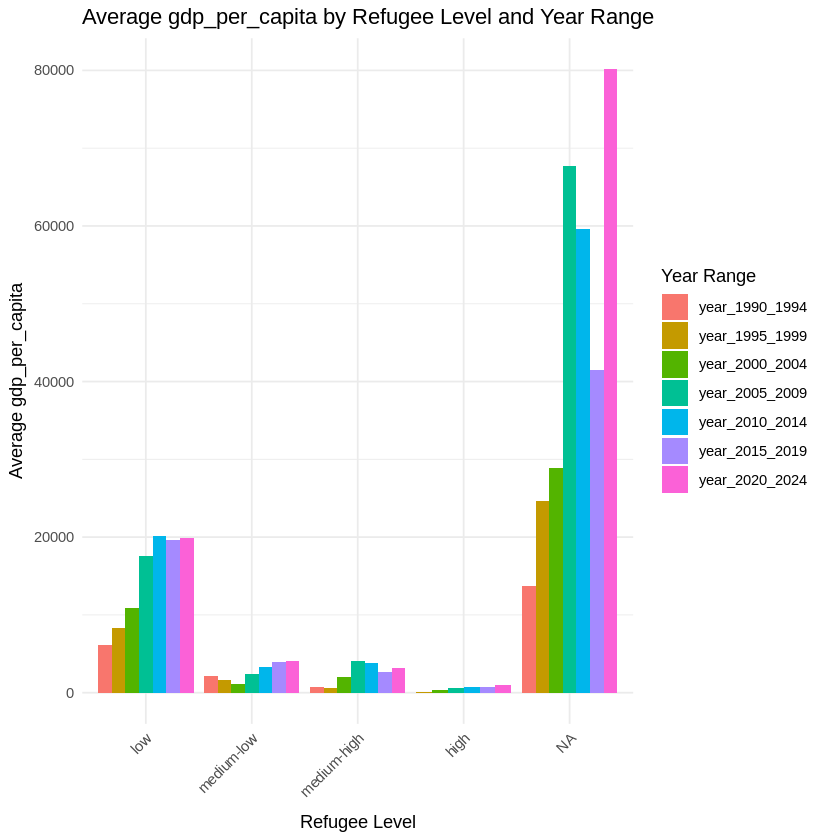

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: Refugees_Level, average_edu_exp_gdp, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(year_analysis, aes(x = Refugees_Level, y = average_gdp_per_capita, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Average gdp_per_capita by Refugee Level and Year Range",
       x = "Refugee Level",
       y = "Average gdp_per_capita",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

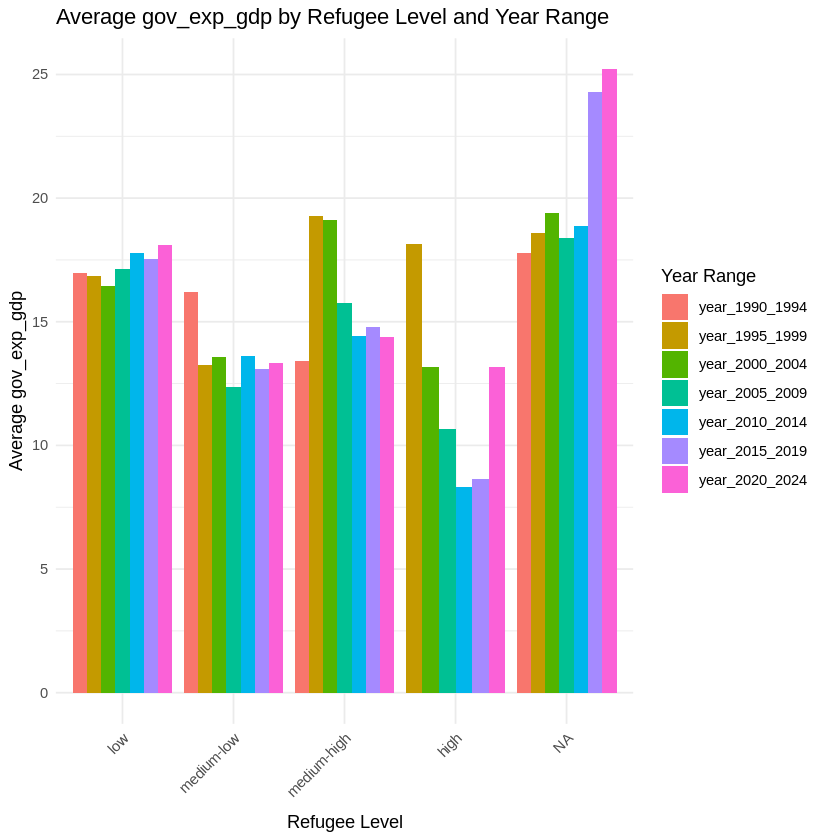

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: Refugees_Level, average_edu_exp_gdp, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(year_analysis, aes(x = Refugees_Level, y = average_gov_exp_gdp, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Average gov_exp_gdp by Refugee Level and Year Range",
       x = "Refugee Level",
       y = "Average gov_exp_gdp",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

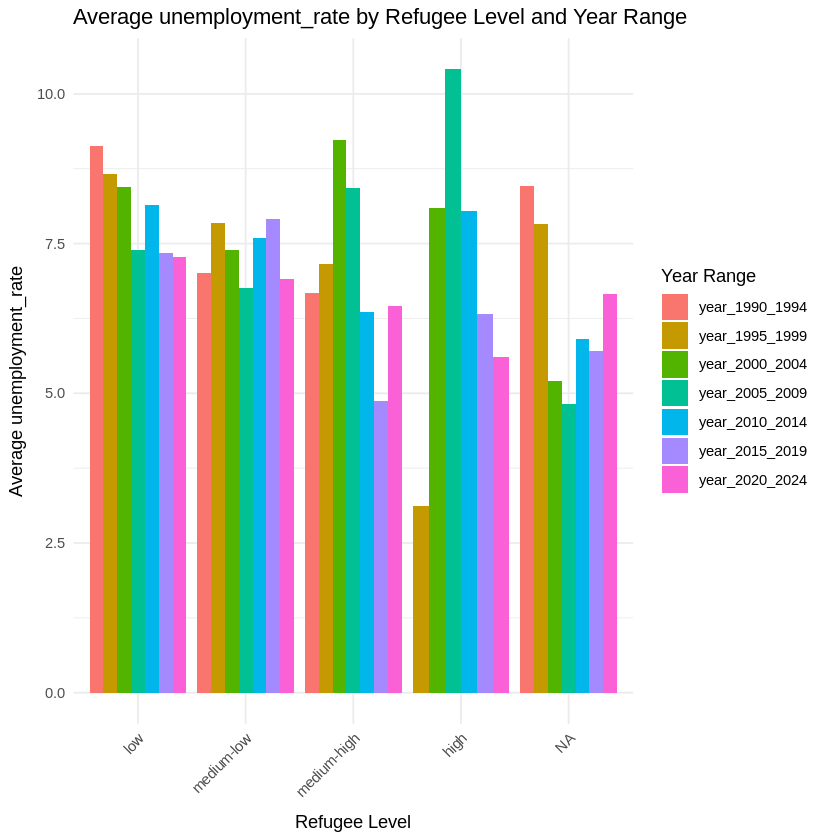

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: Refugees_Level, average_edu_exp_gdp, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(year_analysis, aes(x = Refugees_Level, y = average_unemployment_rate, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Average unemployment_rate by Refugee Level and Year Range",
       x = "Refugee Level",
       y = "Average unemployment_rate",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

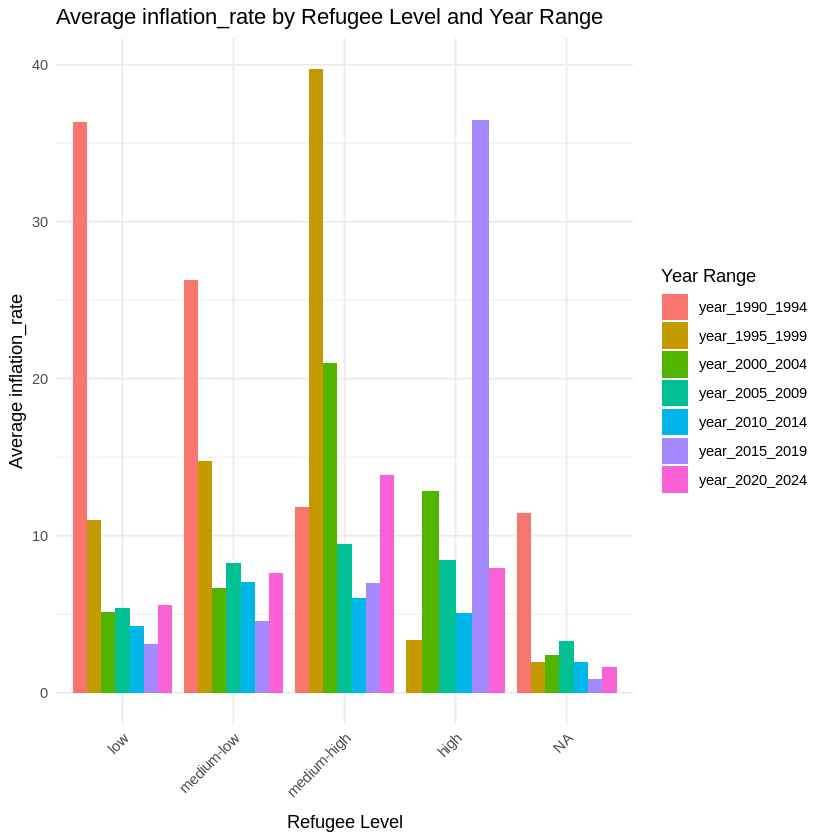

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: Refugees_Level, average_edu_exp_gdp, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(year_analysis, aes(x = Refugees_Level, y = average_inflation_rate, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Average inflation_rate by Refugee Level and Year Range",
       x = "Refugee Level",
       y = "Average inflation_rate",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

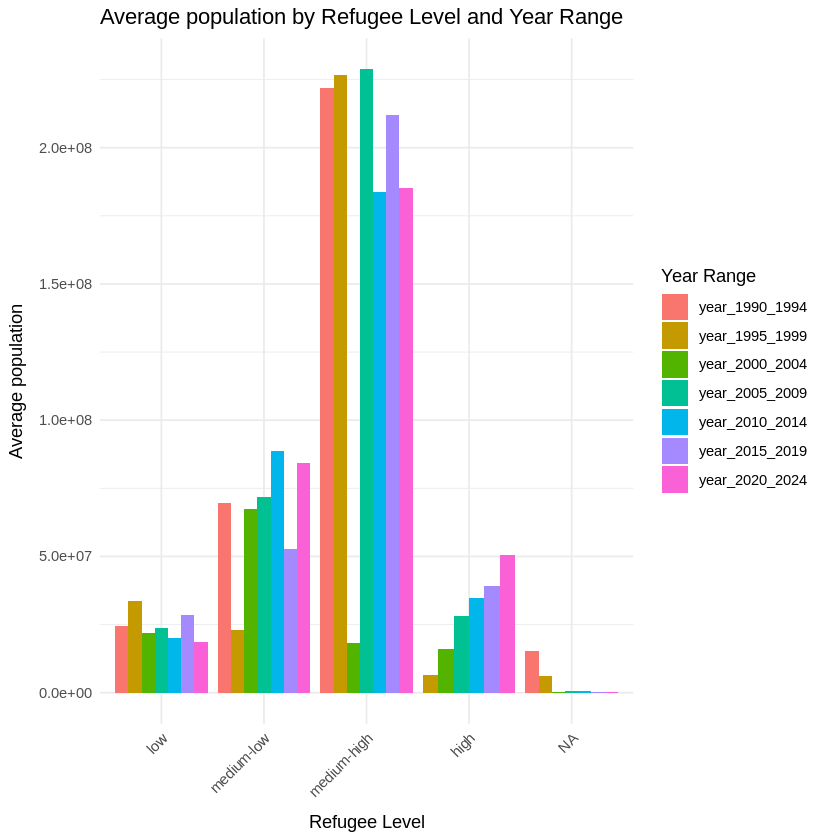

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: Refugees_Level, average_edu_exp_gdp, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(year_analysis, aes(x = Refugees_Level, y = average_population, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Average population by Refugee Level and Year Range",
       x = "Refugee Level",
       y = "Average population",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

### HDI_Level

In [ ]:
# Load necessary library for data manipulation
library(dplyr)

# Group data by year and HDI_Level and calculate the sum of Refugees
refugee_hdi_year_analysis <- df %>%
    group_by(year, HDI_Level) %>%
    summarise(total_refugees = sum(Refugees, na.rm = TRUE)) %>%
    ungroup()

# Display the result
print(refugee_hdi_year_analysis)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 136 × 3
    year HDI_Level                total_refugees
   <int> <chr>                             <int>
 1  1990 developed countries                   0
 2  1990 developing countries                  0
 3  1990 underdeveloped countries              0
 4  1990 NA                                    0
 5  1991 developed countries               27022
 6  1991 developing countries             596512
 7  1991 underdeveloped countries           2177
 8  1991 NA                                   16
 9  1992 developed countries               19131
10  1992 developing countries             811877
# ℹ 126 more rows


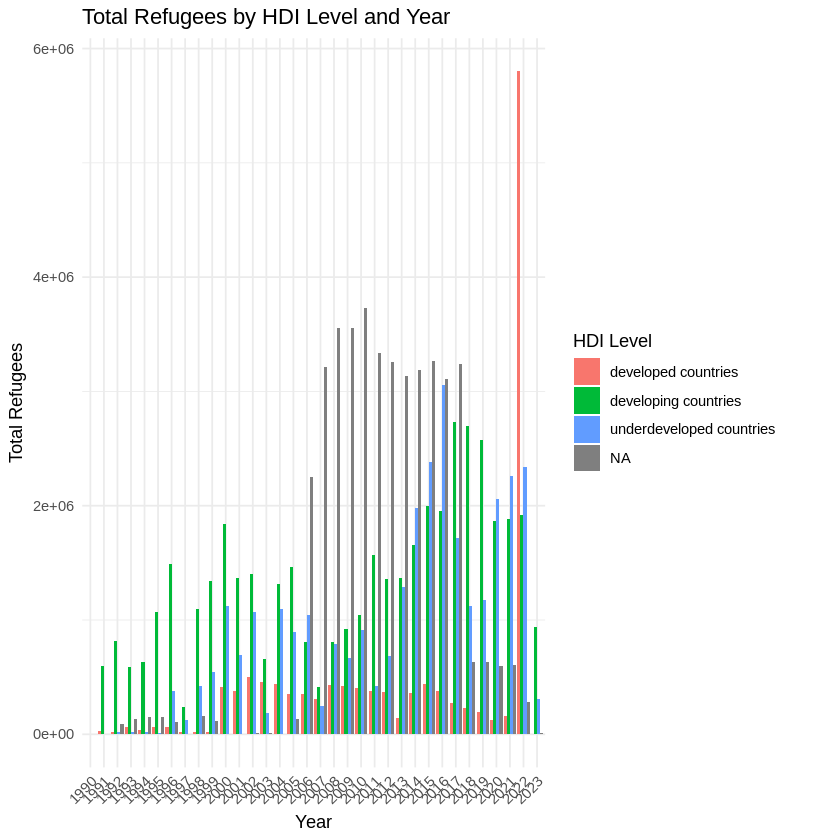

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The refugee_hdi_year_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: year, HDI_Level, and total_refugees

# Create a grouped bar chart to visualize the relationship
ggplot(refugee_hdi_year_analysis, aes(x = factor(year), y = total_refugees, fill = HDI_Level)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Total Refugees by HDI Level and Year",
       x = "Year",
       y = "Total Refugees",
       fill = "HDI Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [ ]:
# Load necessary library for data manipulation
library(dplyr)

# Define the year range columns
year_range_cols <- c(
    "year_1990_1994", "year_1995_1999", "year_2000_2004",
    "year_2005_2009", "year_2010_2014", "year_2015_2019",
    "year_2020_2024"
)

# Initialize an empty dataframe to store the analysis results
hdi_year_range_analysis <- data.frame()

# Iterate through each year range column
for (year_col in year_range_cols) {

  # Filter data for the current year range (where the one-hot encoded column is 1)
  df_filtered <- df %>%
    filter(!!sym(year_col) == 1)

  # Group filtered data by HDI_Level and calculate the sum of Refugees
  analysis_result <- df_filtered %>%
    group_by(HDI_Level) %>%
    summarise(total_refugees = sum(Refugees, na.rm = TRUE)) %>%
    ungroup()

  # Add a column for the current year range
  analysis_result$year_range <- year_col

  # Combine with the main analysis dataframe
  hdi_year_range_analysis <- bind_rows(hdi_year_range_analysis, analysis_result)
}

# Display the result
print(hdi_year_range_analysis)

                  HDI_Level total_refugees     year_range
1       developed countries         148732 year_1990_1994
2      developing countries        2634791 year_1990_1994
3  underdeveloped countries          72335 year_1990_1994
4                      <NA>         367218 year_1990_1994
5       developed countries         184780 year_1995_1999
6      developing countries        5222973 year_1995_1999
7  underdeveloped countries        1483736 year_1995_1999
8                      <NA>         529706 year_1995_1999
9       developed countries        2194732 year_2000_2004
10     developing countries        6591354 year_2000_2004
11 underdeveloped countries        4172945 year_2000_2004
12                     <NA>          24193 year_2000_2004
13      developed countries        1875191 year_2005_2009
14     developing countries        4413172 year_2005_2009
15 underdeveloped countries        3647813 year_2005_2009
16                     <NA>       12700456 year_2005_2009
17      develo

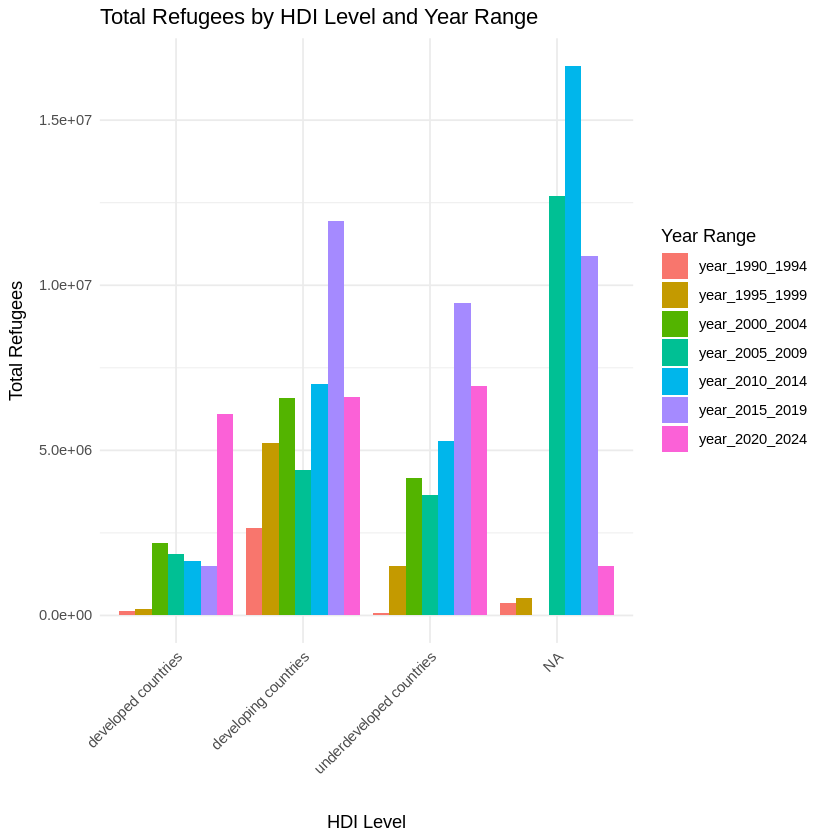

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The hdi_year_range_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: HDI_Level, total_refugees, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(hdi_year_range_analysis, aes(x = HDI_Level, y = total_refugees, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Total Refugees by HDI Level and Year Range",
       x = "HDI Level",
       y = "Total Refugees",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [ ]:
# Load necessary library for data manipulation
library(dplyr)

# Define the year range columns
year_range_cols <- c(
    "year_1990_1994", "year_1995_1999", "year_2000_2004",
    "year_2005_2009", "year_2010_2014", "year_2015_2019",
    "year_2020_2024"
)

# Initialize an empty dataframe to store the analysis results
hdi_year_range_analysis <- data.frame()

# Iterate through each year range column
for (year_col in year_range_cols) {

  # Filter data for the current year range (where the one-hot encoded column is 1)
  df_filtered <- df %>%
    filter(!!sym(year_col) == 1)

  # Group filtered data by HDI_Level and calculate the sum of Returned.Refugees
  analysis_result <- df_filtered %>%
    group_by(HDI_Level) %>%
    summarise(total_Returned.Refugees = sum(Returned.Refugees, na.rm = TRUE)) %>%
    ungroup()

  # Add a column for the current year range
  analysis_result$year_range <- year_col

  # Combine with the main analysis dataframe
  hdi_year_range_analysis <- bind_rows(hdi_year_range_analysis, analysis_result)
}

# Display the result
print(hdi_year_range_analysis)

                  HDI_Level total_Returned.Refugees     year_range
1       developed countries                    3744 year_1990_1994
2      developing countries                  418643 year_1990_1994
3  underdeveloped countries                    2542 year_1990_1994
4                      <NA>                    2468 year_1990_1994
5       developed countries                    1146 year_1995_1999
6      developing countries                  409636 year_1995_1999
7  underdeveloped countries                  168981 year_1995_1999
8                      <NA>                     641 year_1995_1999
9       developed countries                   76942 year_2000_2004
10     developing countries                  246006 year_2000_2004
11 underdeveloped countries                  396046 year_2000_2004
12                     <NA>                       0 year_2000_2004
13      developed countries                   18705 year_2005_2009
14     developing countries                  302941 year_2005_

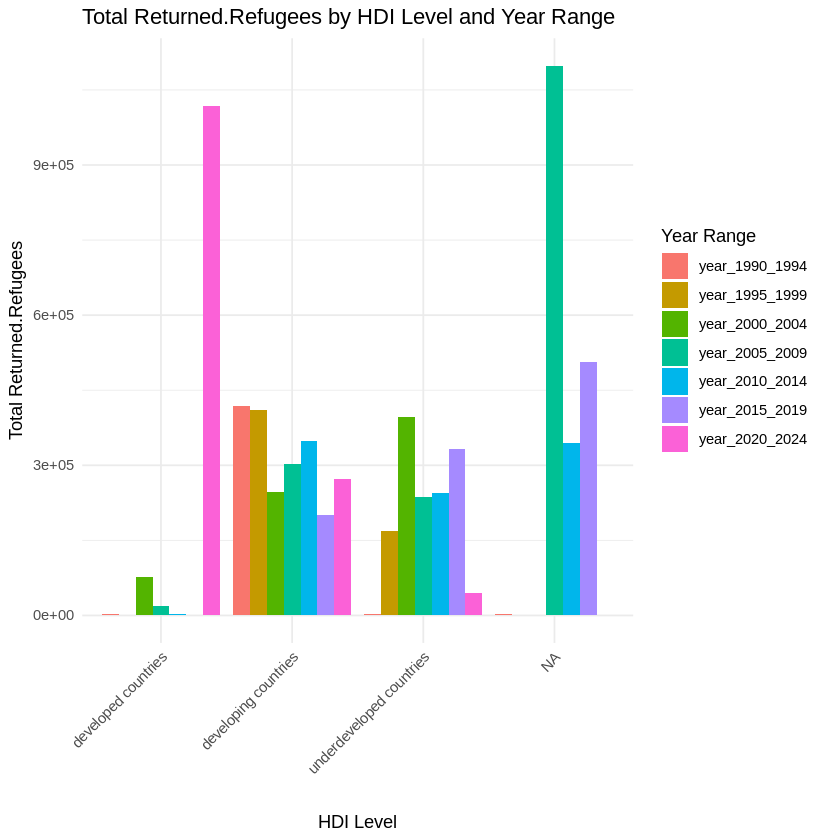

In [ ]:
# Load necessary library for visualization
library(ggplot2)

# The hdi_year_range_analysis dataframe from the previous cell contains the data needed for visualization
# It has columns: HDI_Level, total_refugees, and year_range

# Create a grouped bar chart to visualize the relationship
ggplot(hdi_year_range_analysis, aes(x = HDI_Level, y = total_Returned.Refugees, fill = year_range)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Total Returned.Refugees by HDI Level and Year Range",
       x = "HDI Level",
       y = "Total Returned.Refugees",
       fill = "Year Range") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

# Random Forest Model

In [ ]:
print(colnames(df))

 [1] "country"                 "iso2c"                  
 [3] "iso3c"                   "year"                   
 [5] "lastupdated"             "edu_exp_gdp"            
 [7] "gdp_per_capita"          "gov_exp_gdp"            
 [9] "unemployment_rate"       "inflation_rate"         
[11] "population"              "urban_pop_percent"      
[13] "education_index"         "hdi_proxy"              
[15] "region"                  "capital"                
[17] "longitude"               "latitude"               
[19] "income"                  "lending"                
[21] "Country.of.Asylum"       "Country.of.Origin"      
[23] "Country.of.Asylum.ISO"   "Refugees"               
[25] "Returned.Refugees"       "Asylum.Seekers"         
[27] "IDPs"                    "Returned.IDPs"          
[29] "Stateless"               "HST"                    
[31] "OOC"                     "HDI_Level"              
[33] "year_1990_1994"          "year_1995_1999"         
[35] "year_2000_2004"          

In [ ]:
# Select the specified columns to create the new dataframe
df_dataset <- df[, c(
    "year_1990_1994", "year_1995_1999", "year_2000_2004",
    "year_2005_2009", "year_2010_2014", "year_2015_2019",
    "year_2020_2024", "income_level",
    "Unemployment_rate_level", "inflation_rate_level",
    "Refugees_Level", "Returned.Refugees_Level"
)]

# Display the first few rows of the new dataframe
head(df_dataset)

,year_1990_1994,year_1995_1999,year_2000_2004,year_2005_2009,year_2010_2014,year_2015_2019,year_2020_2024,income_level,Unemployment_rate_level,inflation_rate_level,Refugees_Level,Returned.Refugees_Level
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<fct>,<fct>,<fct>
1,0,0,0,0,0,1,0,low,medium-low,low,high,high
2,0,0,0,0,0,1,0,low,medium-high,medium-low,high,high
3,0,0,0,0,0,1,0,low,medium-high,medium-low,high,high
4,0,0,0,0,1,0,0,low,medium-low,medium-low,high,medium-high
5,0,0,0,1,0,0,0,low,medium-low,low,high,high
6,0,0,0,0,1,0,0,low,medium-low,medium-high,high,medium-high


In [ ]:
# Install necessary packages if you haven't already
install.packages(c("randomForest", "caret"), dependencies = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘rbibutils’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy

In [ ]:
# Load necessary libraries
library(randomForest)
library(caret) # For data splitting and evaluation

# Prepare the data for modeling
# Ensure the target variable is a factor
df_dataset$Refugees_Level <- as.factor(df_dataset$Refugees_Level)

# Handle missing values - A simple approach is to remove rows with NA
# For a real analysis, consider more sophisticated imputation methods
df_model <- na.omit(df_dataset)

# Split the data into training and testing sets
set.seed(123) # for reproducibility
train_index <- createDataPartition(df_model$Refugees_Level, p = 0.8, list = FALSE)
train_data <- df_model[train_index, ]
test_data <- df_model[-train_index, ]

# Define the predictor variables (all columns except the target)
# and the target variable
predictor_cols <- setdiff(colnames(train_data), "Refugees_Level")
formula <- as.formula(paste("Refugees_Level ~", paste(predictor_cols, collapse = " + ")))

# Train the Random Forest model
# Adjust ntree and other parameters based on performance
rf_model <- randomForest(formula, data = train_data, ntree = 100)

# Print the model summary
print(rf_model)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice




Call:
 randomForest(formula = formula, data = train_data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 22.52%
Confusion matrix:
             low medium-low medium-high high class.error
low         2025         16           4    0 0.009779951
medium-low   434         48          13    0 0.903030303
medium-high  108         22          43    3 0.755681818
high           7          2           9   10 0.642857143


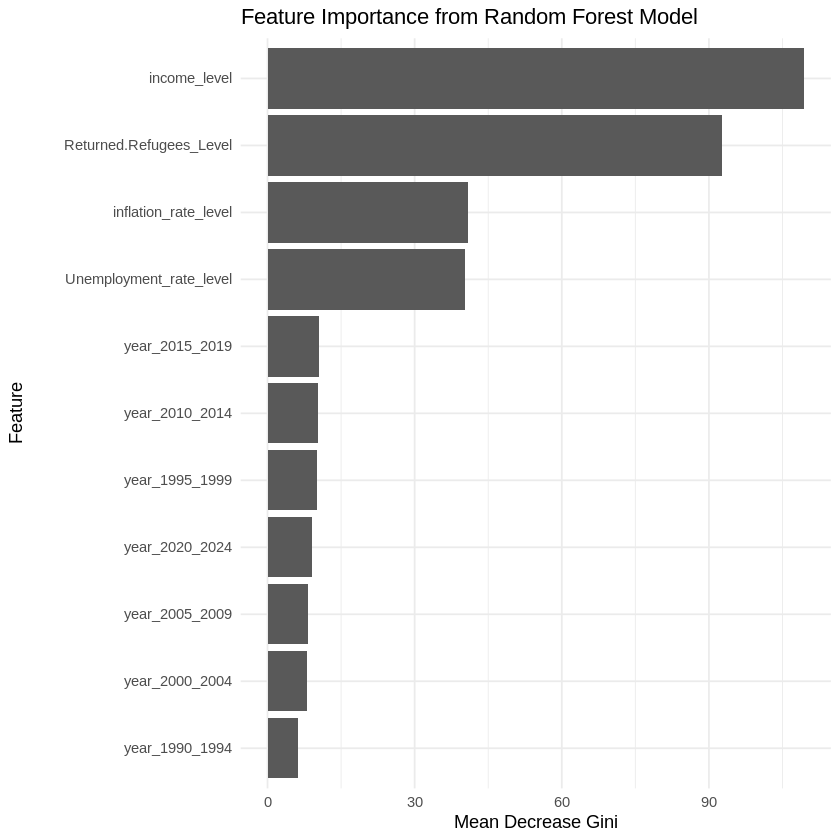

In [ ]:
# Assuming rf_model has been successfully trained

# Get feature importance
importance <- importance(rf_model)

# Convert to a dataframe for easier plotting
importance_df <- as.data.frame(importance)

# Add feature names as a column
importance_df$feature <- rownames(importance_df)

# Sort by MeanDecreaseGini (a common measure of importance in randomForest)
importance_df <- importance_df[order(-importance_df$MeanDecreaseGini), ]

# Load necessary library for visualization if not already loaded
library(ggplot2)

# Create a bar plot of feature importance
ggplot(importance_df, aes(x = reorder(feature, MeanDecreaseGini), y = MeanDecreaseGini)) +
  geom_bar(stat = "identity") +
  coord_flip() + # Flip coordinates for better readability of feature names
  labs(title = "Feature Importance from Random Forest Model",
       x = "Feature",
       y = "Mean Decrease Gini") +
  theme_minimal()